In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.decomposition import PCA
import seaborn as sns

     Temperature              L          R    A_M  Color Spectral_Class  Type
0           3068       0.002400     0.1700  16.12    red              M     0
1           3042       0.000500     0.1542  16.60    red              M     0
2           2600       0.000300     0.1020  18.70    red              M     0
3           2800       0.000200     0.1600  16.65    red              M     0
4           1939       0.000138     0.1030  20.06    red              M     0
..           ...            ...        ...    ...    ...            ...   ...
235        38940  374830.000000  1356.0000  -9.93   blue              O     5
236        30839  834042.000000  1194.0000 -10.63   blue              O     5
237         8829  537493.000000  1423.0000 -10.73  white              A     5
238         9235  404940.000000  1112.0000 -11.23  white              A     5
239        37882  294903.000000  1783.0000  -7.80   blue              O     5

[240 rows x 7 columns]
     Temperature              L         

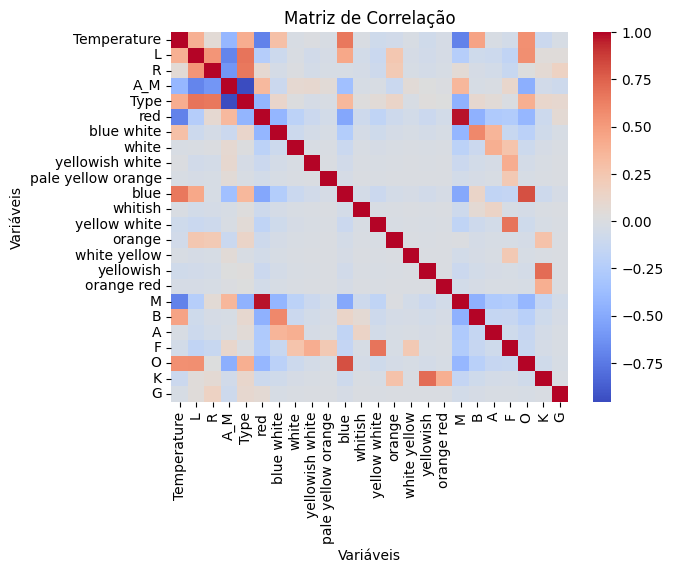

In [65]:
dados = pd.read_csv("Stars.csv")
colunas = dados.columns

#verifica se há células vázias no dataframe dados
null = pd.isnull(dados)
if True in null.values:
    print("Há células vázias no dataframe")


#preparando a base de dados
dados["Color"] = dados["Color"].str.lower()
dados["Color"] = dados["Color"].str.replace('-', " ")
print(dados)



categoriesColor = list(dados["Color"].unique())
categoriesSpec = list(dados["Spectral_Class"].unique())

encoder = OneHotEncoder(categories= [categoriesColor])
encoder.fit_transform(dados["Color"].values.reshape(-1,1))
buffer = encoder.transform(dados["Color"].values.reshape(-1,1)).toarray()
dados = dados.join(pd.DataFrame(data = buffer, columns = categoriesColor))
dados = dados.drop(columns= ['Color'])


encoder = OneHotEncoder(categories= [categoriesSpec])
encoder.fit_transform(dados["Spectral_Class"].values.reshape(-1,1))
buffer = encoder.transform(dados["Spectral_Class"].values.reshape(-1,1)).toarray()
dados = dados.join(pd.DataFrame(data = buffer, columns = categoriesSpec))
dados = dados.drop(columns= ['Spectral_Class'])
correlation_matrix = dados.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm')

# Adicione título e rótulos dos eixos
plt.title('Matriz de Correlação')
plt.xlabel('Variáveis')
plt.ylabel('Variáveis')
print(dados)
dados = dados.drop(columns= ['Type'])

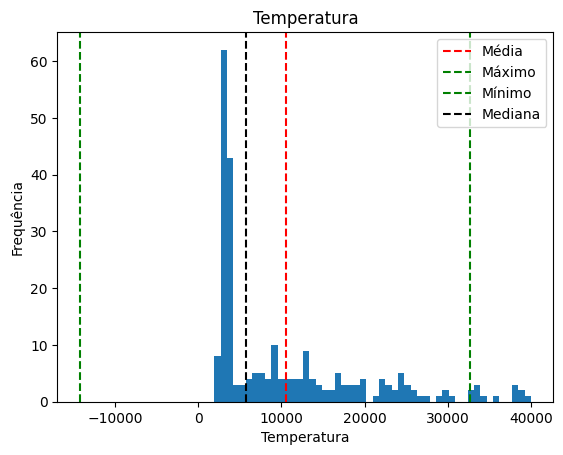

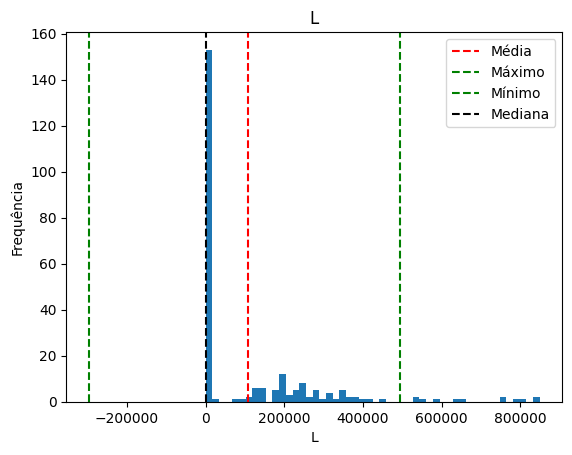

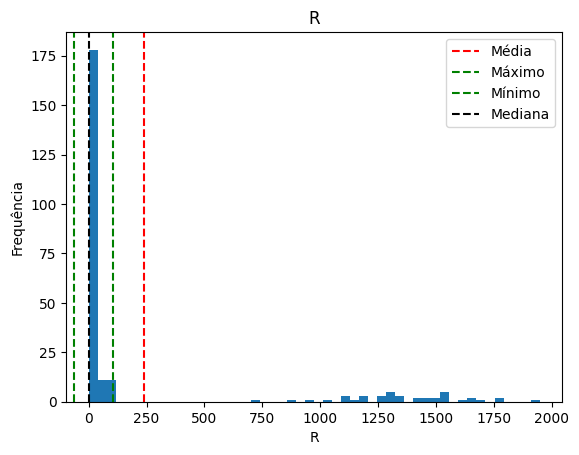

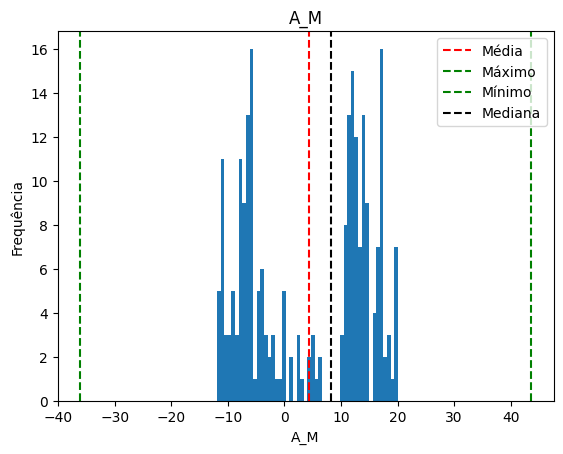

In [66]:
from scipy.stats import kurtosis
def histograma(dado, title, bin = 50):
    plt.hist(dado, bins = bin)
    plt.title(title)
    plt.xlabel(title)
    plt.ylabel('Frequência')
    mean = np.mean(dado)
    q3 = np.percentile(dado, 75)
    q1 = np.percentile(dado, 25)
    IIQ =  q3 - q1
    plt.axvline(x=mean, color="red", linestyle="--", label = "Média")
    plt.axvline(x=q3 + 1.5*IIQ, color="g", linestyle="--", label = "Máximo")
    plt.axvline(x=q1 - 1.5*IIQ, color="g", linestyle="--", label = "Mínimo")
    plt.axvline(x= np.percentile(dado, 50), color="black", linestyle="--", label = "Mediana")
    plt.legend()
    plt.show()

go = True
if go == True:
    histograma(dados["Temperature"], "Temperatura") #não é normal
    histograma(dados["L"], "L") #não é normal
    histograma(dados["R"], "R") #não é normal
    histograma(dados["A_M"], "A_M") #é normal
    #histograma(dados["Type"], "Type") #é normal






In [67]:
scaler1 = MinMaxScaler()
scaler2 = StandardScaler()


dados['Temperature'] = scaler2.fit_transform(dados[['Temperature']])
dados["L"] = scaler1.fit_transform(dados[["L"]])
dados["R"] = scaler1.fit_transform(dados[["R"]])
#dados["Type"] = scaler1.fit_transform(dados[["Type"]])

dados["A_M"] = scaler2.fit_transform(dados[["A_M"]])

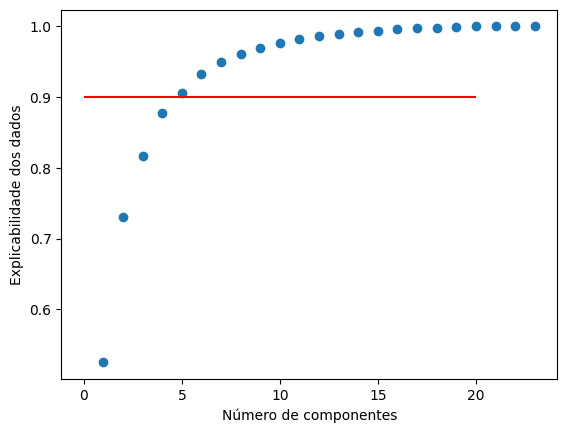

90%% dos dados são explicados com as 5 componentes.
Razão da Variação: [57.91187845 22.62610655  9.59885372  6.70204783  3.16111345]


In [68]:

pca = PCA()

pca.fit(dados)
expl = pca.explained_variance_ratio_
svalues = pca.singular_values_
dados_reduzidos = pca.transform(dados)

explainability = pca.explained_variance_ratio_.cumsum()
factors = np.arange(1,dados.shape[1]+1,1)

plt.scatter(factors,explainability)
plt.hlines(0.9,0,20,'r')
plt.xlabel('Número de componentes')
plt.ylabel('Explicabilidade dos dados')
plt.show()
factors_below_threshold = factors[explainability < 0.9]
if len(factors_below_threshold) > 0:
    p = factors_below_threshold.max() + 1
else:
    p = 2

if p<2:
    p=2

print('90%% dos dados são explicados com as ' + str(p) + ' componentes.')

pca = PCA(n_components=p)
pca.fit(dados)
dados_reduzidos = pca.transform(dados)
singular_values = pca.singular_values_
# Calculando a razão da variação
variation_ratio = singular_values**2 / np.sum(singular_values**2)

# Imprimindo a razão da variação
print("Razão da Variação:", variation_ratio*100)

      Temperature     L     R    A_M    red  blue white  white  \
0           38.30  5.31  3.12 -31.70 -16.23        4.57  -0.18   
1           -9.56  2.49  4.44 -17.56   5.12       -2.74  -0.62   
2           -2.18 -0.77  0.52  -1.70  -2.40        5.00   0.49   
Soma        26.56  7.03  8.08 -50.96 -13.51        6.83  -0.31   

      yellowish white  pale yellow orange   blue  ...  white yellow  \
0               -0.12               -0.08  12.26  ...         -0.08   
1               -0.35               -0.10  -1.66  ...         -0.10   
2                0.06                0.03  -4.18  ...          0.03   
Soma            -0.41               -0.15   6.42  ...         -0.15   

      yellowish  orange red      M     B     A     F      O     K     G  
0         -0.14       -0.03 -16.31  6.25  0.41 -0.53  10.19 -0.07  0.05  
1          0.00        0.01   4.90 -4.83 -0.50 -0.98   0.80  0.42  0.19  
2          0.16        0.05  -2.46  3.16  1.98  0.69  -3.77  0.35  0.04  
Soma       0.02  

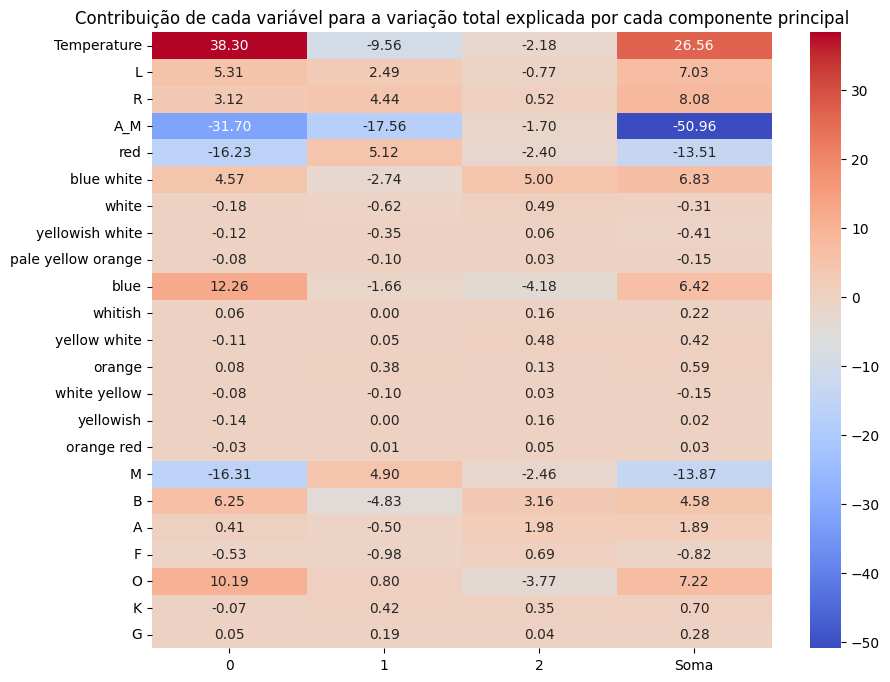

Pesos das variáveis nas três primeiras componentes principais em porcentagem:
      Temperature     L     R    A_M    red  blue white  white  \
0           38.30  5.31  3.12 -31.70 -16.23        4.57  -0.18   
1           -9.56  2.49  4.44 -17.56   5.12       -2.74  -0.62   
2           -2.18 -0.77  0.52  -1.70  -2.40        5.00   0.49   
Soma        26.56  7.03  8.08 -50.96 -13.51        6.83  -0.31   

      yellowish white  pale yellow orange   blue  ...  white yellow  \
0               -0.12               -0.08  12.26  ...         -0.08   
1               -0.35               -0.10  -1.66  ...         -0.10   
2                0.06                0.03  -4.18  ...          0.03   
Soma            -0.41               -0.15   6.42  ...         -0.15   

      yellowish  orange red      M     B     A     F      O     K     G  
0         -0.14       -0.03 -16.31  6.25  0.41 -0.53  10.19 -0.07  0.05  
1          0.00        0.01   4.90 -4.83 -0.50 -0.98   0.80  0.42  0.19  
2          0.

In [69]:

pesos = pca.components_
pesos_porcentagem = (pesos * variation_ratio[:, np.newaxis]*100 ).round(2)
#pesos_porcentagem = (pesos*100 ).round(2)

# Criando um DataFrame com os pesos organizados
df_pesos = pd.DataFrame(pesos_porcentagem, columns=dados.columns)
# Supondo que 'df_pesos' seja o DataFrame contendo os pesos das variáveis nas componentes principais
df_pesos = df_pesos.drop(index=[3])
df_pesos = df_pesos.drop(index=[4])

def remove_soma(x, y, df_pesos, title):
    # Verificar se as colunas de 'x' até 'y' estão presentes no DataFrame
    if x in df_pesos.columns and y in df_pesos.columns:
        # Imprimir as colunas antes de remover
        print("Colunas antes de remover:")
        print(df_pesos.columns)

        # Calcular a soma das colunas de 'x' até 'y' em cada linha
        df_pesos[title] = df_pesos.loc[:, x:y].sum(axis=1)

        # Remover as colunas de 'x' até 'y'
        df_pesos = df_pesos.drop(columns=df_pesos.loc[:, x:y].columns)

        # Visualizar o DataFrame atualizado
        print("\nDataFrame com a nova coluna de soma e as colunas de 'x' até 'y' removidas:")
        #print(df_pesos)
    else:
        print("As colunas especificadas não estão presentes no DataFrame.")
    return df_pesos

#df_pesos = remove_soma('red', 'orange red', df_pesos, "Color")
#df_pesos = remove_soma('M', 'G', df_pesos, "Spectral Class")

df_pesos = df_pesos.T
df_pesos['Soma'] = df_pesos.sum(axis=1)
df_pesos = df_pesos.T
print(df_pesos)
plt.figure(figsize=(10, 8))

# Criar o heatmap
sns.heatmap(df_pesos.T, cmap='coolwarm',annot=True, fmt=".2f")

# Configurar o título
plt.title('Contribuição de cada variável para a variação total explicada por cada componente principal')

# Mostrar o heatmap
plt.show()
# Visualizando o DataFrame
print("Pesos das variáveis nas três primeiras componentes principais em porcentagem:")
print(df_pesos)

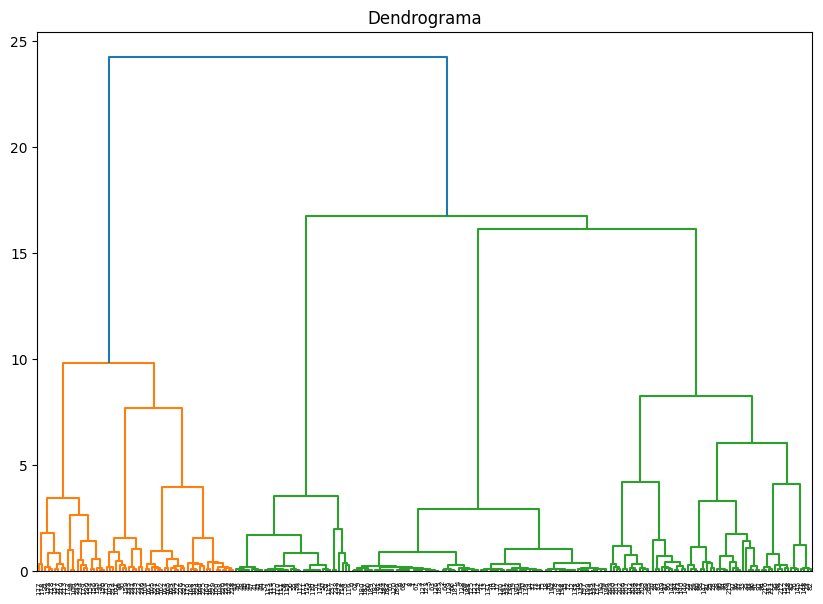

In [70]:
import scipy.cluster.hierarchy as shc
import seaborn as sns

plt.figure(figsize=(10, 7))
plt.title("Dendrograma")
clusters = shc.linkage(dados_reduzidos, method='ward', metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()

In [71]:
from sklearn.metrics import silhouette_samples, silhouette_score

def ncluster(metodo, x,  limite_superior):

    Ns = []
    for i in range(2, limite_superior + 1):
        Ns.append(i)

    Ns = np.asarray(Ns)

    silhueta_scores = np.zeros(len(Ns))
    pontos_bad = np.zeros(len(Ns))

    for i,N in enumerate(Ns):
        if metodo.upper() == "K":
            kmeans = KMeans(n_clusters=N).fit(x)
            categorias = kmeans.labels_

        elif metodo.upper() == "H":
            aggclust = AgglomerativeClustering(n_clusters=N, linkage='ward').fit(x)
            categorias = aggclust.labels_

        silhueta_scores[i] = silhouette_score(x, categorias)
        sample_silhouette_values = silhouette_samples(x, categorias)
        mask = (sample_silhouette_values < 0 )
        pontos_bad[i] = (100 * mask.sum() / len(mask)).round(2)
    print(pontos_bad, silhueta_scores)

    if 0 in pontos_bad:
        # Se sim, seleciona o índice do melhor valor de silhueta onde pontos ruins são diferentes de zero
        indices = np.where(pontos_bad == 0)[0]
        sil_valor = np.where(silhueta_scores == np.max(silhueta_scores[indices]))[0]
        melhor_indice = int(sil_valor)
        print('melhor', sil_valor)
        opt_n_clusters = Ns[melhor_indice]

        if len(silhueta_scores[pontos_bad == 0]) == 1:
            plt.plot(Ns[melhor_indice],silhueta_scores[pontos_bad == 0])
            plt.hlines(silhueta_scores[pontos_bad == 0],Ns[melhor_indice] - 0.75, Ns[melhor_indice] + 0.75, 'b' )
        else:
            plt.plot(Ns[pontos_bad == 0],silhueta_scores[pontos_bad == 0])
        plt.xlabel('Clusters')
        plt.ylabel('Métrica de performance')
        plt.title("Fator de silhueta para o # de clusters sem pontos mal atribuídos")
        plt.show()
    else:
        opt_n_clusters = Ns[(silhueta_scores/pontos_bad).argmax()]
        plt.plot(Ns,silhueta_scores/pontos_bad)
        plt.xlabel('Clusters')
        plt.ylabel('Métrica de performance')
        plt.title("Métrica de performance para o # de clusters quando há ponto mal atribuidos")
        plt.show()

    return opt_n_clusters

[5.   4.58 2.92 0.42 0.   0.83 1.25 1.25 2.08] [0.40195525 0.43712321 0.55175941 0.57513255 0.60698091 0.6278382
 0.64608301 0.66160499 0.67511095]
melhor [4]


<ipython-input-71-2af44a20ca5c>:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  melhor_indice = int(sil_valor)


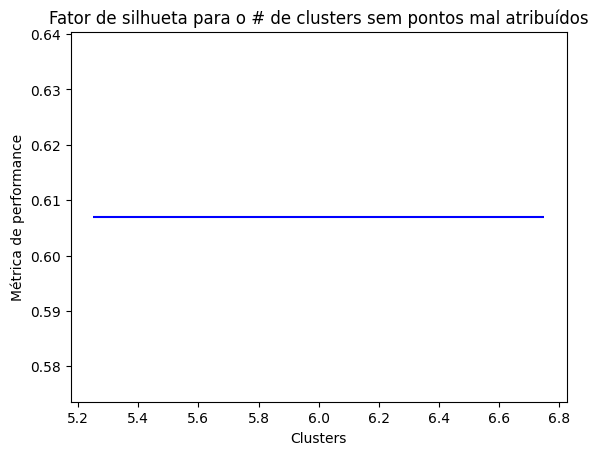

Tempo de execução: 0.38593411445617676 segundos


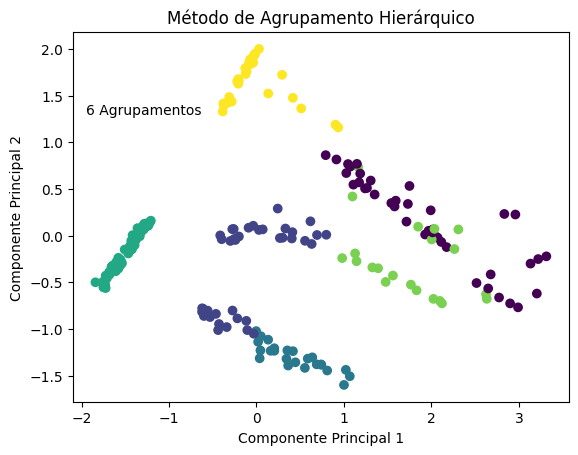

In [72]:
from sklearn.cluster import AgglomerativeClustering
import time
start_time = time.time()
n_clustersH = ncluster('H', dados_reduzidos, 10)

aggclust = AgglomerativeClustering(n_clusters=n_clustersH, linkage='ward').fit(dados_reduzidos)
categorias = aggclust.labels_
plt.scatter(dados_reduzidos[:,0], dados_reduzidos[:,1], c=categorias)
plt.text(-1.95,1.3,str(n_clustersH)+' Agrupamentos')
plt.title("Método de Agrupamento Hierárquico")
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
end_time = time.time()

# Calcula o tempo total de execução
execution_time1 = end_time - start_time

# Imprime o tempo total de execução
print("Tempo de execução:", execution_time1, "segundos")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[0.42 3.33 0.83 0.42 0.   0.42 0.83 0.42 0.83] [0.4073609  0.43191649 0.54859823 0.57819911 0.60698091 0.62744837
 0.65046425 0.66666644 0.67449669]
melhor [4]


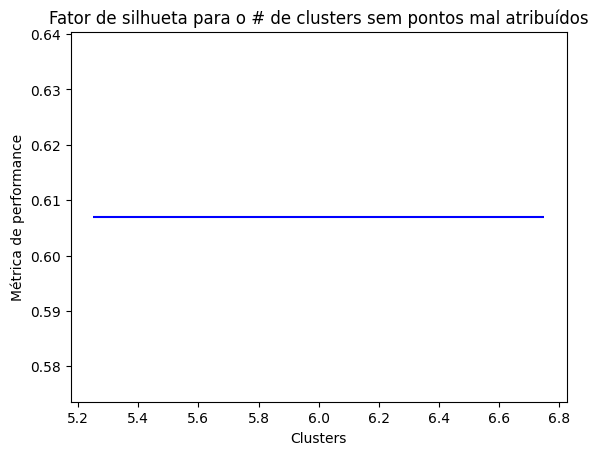

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


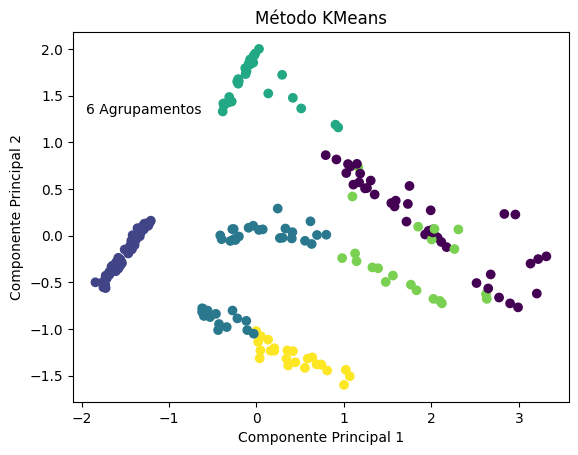

Tempo de execução: 0.29616236686706543 segundos


In [85]:
from sklearn.cluster import KMeans
n_clustersK = ncluster('K', dados_reduzidos, 10)
kmeans = KMeans(n_clusters=n_clustersK).fit(dados_reduzidos)
categorias = kmeans.labels_

start_time = time.time()

plt.scatter(dados_reduzidos[:,0], dados_reduzidos[:,1], c=categorias)
plt.text(-1.95,1.3,str(n_clustersK)+' Agrupamentos')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title("Método KMeans")
plt.show()

end_time = time.time()

# Calcula o tempo total de execução
execution_time2 = end_time - start_time

# Imprime o tempo total de execução
print("Tempo de execução:", execution_time2, "segundos")


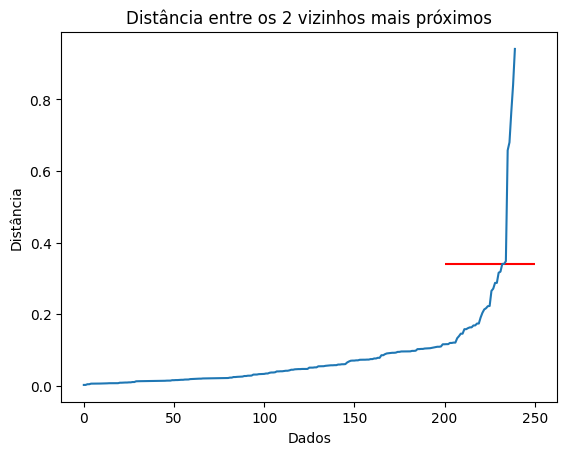

In [74]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Suponha que X seja seu conjunto de dados
minN = 5
neighbors = NearestNeighbors(n_neighbors=minN)
neighbors_fit = neighbors.fit(dados_reduzidos)
distances, indices = neighbors_fit.kneighbors(dados_reduzidos)

# Ordenar e plotar as distâncias
distances = np.sort(distances, axis=0)
distances = distances[:,1]

taxas_de_variacao = []

for i in range(1, len(distances) - 1):
    taxa = (distances[i + 1] - distances[i - 1]) / 2
    taxas_de_variacao.append(taxa)

#print(np.max(taxas_de_variacao))
aumentos = np.diff(taxas_de_variacao)
#print(np.max(aumentos))
ponto_de_inflexao = np.argmax(aumentos) + 1
#print(np.max(ponto_de_inflexao) - 1)

epsilon = distances[ponto_de_inflexao ]

plt.hlines(epsilon, 200, 250, 'r')
plt.title("Distância entre os 2 vizinhos mais próximos")
plt.ylabel("Distância")
plt.xlabel("Dados")
plt.plot(distances)
plt.show()


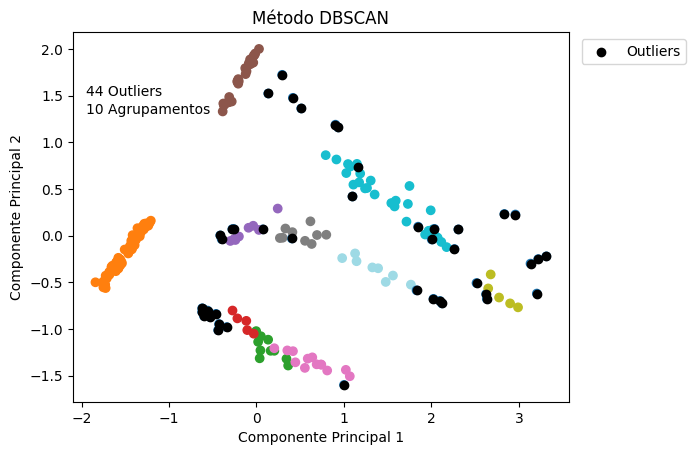

Tempo de execução: 0.32002949714660645 segundos


In [75]:
from sklearn.cluster import DBSCAN
import matplotlib.cm as cm

start_time = time.time()
dbscan = DBSCAN(eps=epsilon, min_samples=minN).fit(dados_reduzidos)
categorias = dbscan.labels_
# Filtra os dados para os outliers (categories == -1)
outliers = dados_reduzidos[categorias == -1]

plt.scatter(dados_reduzidos[:,0], dados_reduzidos[:,1], c=categorias, cmap="tab20")
# Plot dos outliers em vermelho
plt.scatter(outliers[:, 0], outliers[:, 1], c='k', label='Outliers')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title("Método DBSCAN")
plt.text(-1.95,1.5,str((categorias == -1).sum())+' Outliers')
plt.text(-1.95,1.3,str(categorias.max() + 1)+' Agrupamentos')
plt.show()

end_time = time.time()

# Calcula o tempo total de execução
execution_time3 = end_time - start_time

# Imprime o tempo total de execução
print("Tempo de execução:", execution_time3, "segundos")


In [76]:
import pandas as pd

# Suponha que você tenha os tempos de execução para cada algoritmo em uma lista
execution_times = [execution_time1, execution_time2, execution_time3]

# Crie um DataFrame com os tempos de execução
df_tempo_execucao = pd.DataFrame({
    'Algoritmo': ['Agrupamento Hierárquico', 'KMeans', 'DBSCAN'],
    'Tempo de Execução (segundos)': execution_times
})

# Formate os tempos de execução para três casas decimais
df_tempo_execucao['Tempo de Execução (segundos)'] = df_tempo_execucao['Tempo de Execução (segundos)'].round(3)
# Formate a visualização do DataFrame para alinhar a primeira coluna à esquerda
styled_df_tempo_execucao = df_tempo_execucao.style.set_properties(**{'text-align': 'left'}, subset=['Algoritmo'])

# Imprima o DataFrame com a formatação aplicada
print(df_tempo_execucao)
# Converta o DataFrame para uma tabela em LaTeX
latex_table = df_tempo_execucao.to_latex(index=False)

# Imprima a tabela em LaTeX
print(latex_table)


                 Algoritmo  Tempo de Execução (segundos)
0  Agrupamento Hierárquico                         0.386
1                   KMeans                         0.299
2                   DBSCAN                         0.320
\begin{tabular}{lr}
\toprule
Algoritmo & Tempo de Execução (segundos) \\
\midrule
Agrupamento Hierárquico & 0.386000 \\
KMeans & 0.299000 \\
DBSCAN & 0.320000 \\
\bottomrule
\end{tabular}

